# Read the csv using pandas

In [14]:
#import libraries
import pandas as pd

In [15]:
df = pd.read_csv('AMAZON_MOBILE_DATA.csv',nrows=10000)
# Read the csv using pandas

# Printing the first few rows from top

In [16]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


# Prints information about the Amazon DataSet.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  10000 non-null  object 
 1   Brand Name    7473 non-null   object 
 2   Price         9307 non-null   float64
 3   Rating        10000 non-null  int64  
 4   Reviews       9999 non-null   object 
 5   Review Votes  9676 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 468.9+ KB


# COUNT OF NULL VALUE

In [18]:
print("Number of the mobile phone dataset from Amazon: ", df.shape)
print(df.isnull().sum())
# printing count of null value present in each coloumn(attributes)

Number of the mobile phone dataset from Amazon:  (10000, 6)
Product Name       0
Brand Name      2527
Price            693
Rating             0
Reviews            1
Review Votes     324
dtype: int64


 #  DROP the row containg blank Reviews

In [19]:
df.dropna(subset=['Reviews'], inplace = True)

#     FILL Values in "Brand Name","Price", "Review Votes" column which containing blank values

In [20]:
df["Brand Name"].fillna(value = "Missing", inplace = True)
df["Price"].fillna(value = 0, inplace = True)
df["Review Votes"].fillna(value = 0, inplace = True)

 #                                 CHECKING the NULL VALUE FROM EACH COLUMN

In [21]:
print(df.isnull().sum())

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64


In [22]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

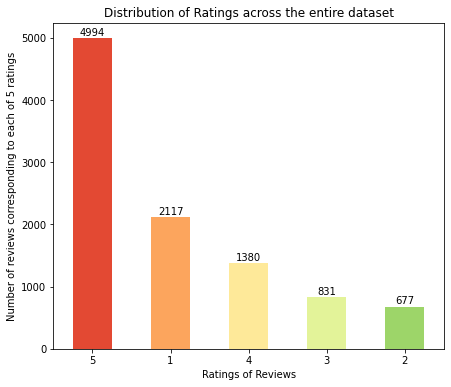

In [23]:
import matplotlib.pyplot as plt
Sentiment = df['Rating'].value_counts()
plt.figure(figsize=(7, 6))
ax = Sentiment.plot(kind='bar', rot=0, color=sns.color_palette("RdYlGn", 6))
ax.set_title("Distribution of Ratings across the entire dataset", y = 1)
ax.set_xlabel('Ratings of Reviews')
ax.set_ylabel('Number of reviews corresponding to each of 5 ratings')
ax.set_xticklabels(('5', '1', '4', '3', '2'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

   #                        TEXT PROCESSING - STEP 1:- LOWER CASING

In [24]:
df['text_lower']=df['Reviews'].str.lower()
#Lower the cases of reviews section

 #                               TEXT PROCESSING - STEP 2:- REMOVAL OF URLs

In [25]:
%%time
import re
df["text_url"] = df["text_lower"].apply(lambda s: ' '.join(re.sub("(https:\/\/.*/)", " ", s).split()))

CPU times: total: 31.2 ms
Wall time: 29.1 ms


 #                              TEXT PROCESSING - STEP 3:- Removal of Punctuations

In [26]:
%%time
df["text_punct"] = df['text_url'].str.replace('[^\w\s]','')
import warnings
warnings.filterwarnings('ignore')

CPU times: total: 46.9 ms
Wall time: 38 ms


<timed exec>:1: FutureWarning: The default value of regex will change from True to False in a future version.


In [27]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,text_lower,text_url,text_punct
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu...",nice phone nice up grade from my pantach revue...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased,very pleased,very pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...,great phone to replace my lost phone the only ...


In [28]:
%%time
pip install nltk

Note: you may need to restart the kernel to use updated packages.
CPU times: total: 46.9 ms
Wall time: 2.25 s



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [29]:
%%time
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
CPU times: total: 6.25 s
Wall time: 13.3 s


True

In [30]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#                               TEXT PROCESSING - STEP 4:- Stop-word Removal

In [31]:
%%time
df['text_stopwords'] = df['text_punct'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

CPU times: total: 328 ms
Wall time: 321 ms


In [32]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,text_lower,text_url,text_punct,text_stopwords
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used phone ...,feel lucky found used phone us used hard phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu...",nice phone nice up grade from my pantach revue...,nice phone nice grade pantach revue clean set ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased,very pleased,very pleased,pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,works good goes slow sometimes good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...,great phone to replace my lost phone the only ...,great phone replace lost phone thing volume bu...


In [33]:
%%time
pip install textblob

Note: you may need to restart the kernel to use updated packages.
CPU times: total: 31.2 ms
Wall time: 2.33 s



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [34]:
from textblob import TextBlob

#                          TEXT PROCESSING - STEP 5:- Spelling Correction

In [35]:
%%time
#df['text_correct'] = df['text_stopwords']
df['text_correct'] = df['text_stopwords'].apply(lambda x : str(TextBlob(x).correct()))                                                 

CPU times: total: 36min 1s
Wall time: 36min 3s


In [36]:
%%time
pip install demoji

Note: you may need to restart the kernel to use updated packages.
CPU times: total: 15.6 ms
Wall time: 2.24 s



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [37]:
%%time
import demoji
demoji.download_codes()

CPU times: total: 15.6 ms
Wall time: 6 ms


  #                             TEXT PROCESSING - STEP 6:- Converting Emoji and emoticons to words

In [38]:
%%time
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
df["text_emoji"] = df["text_correct"].apply(lambda s: deEmojify(s))

CPU times: total: 0 ns
Wall time: 5 ms


In [39]:
%%time
pip install bs4

Note: you may need to restart the kernel to use updated packages.
CPU times: total: 15.6 ms
Wall time: 2.13 s



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [40]:
%%time
pip install requests

Note: you may need to restart the kernel to use updated packages.
CPU times: total: 15.6 ms
Wall time: 2.14 s



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


#                           TEXT PROCESSING - STEP 7:- Removal of HTML Tags

In [41]:
from bs4 import BeautifulSoup
def remove_tags(text):
  UPDATED_TEXT = BeautifulSoup(text, "html.parser")
  for data in UPDATED_TEXT(['style', 'script']):
    data.decompose()
  return ' '.join(UPDATED_TEXT.stripped_strings)

In [42]:
%%time
df["text_removetag"] = df["text_emoji"].apply(remove_tags)

CPU times: total: 406 ms
Wall time: 406 ms


In [43]:
%%time
df.head()

CPU times: total: 0 ns
Wall time: 0 ns


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,text_lower,text_url,text_punct,text_stopwords,text_correct,text_emoji,text_removetag
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used phone ...,feel lucky found used phone us used hard phone...,feel lucky found used phone us used hard phone...,feel lucky found used phone us used hard phone...,feel lucky found used phone us used hard phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu...",nice phone nice up grade from my pantach revue...,nice phone nice grade pantach revue clean set ...,nice phone nice grade patch review clean set e...,nice phone nice grade patch review clean set e...,nice phone nice grade patch review clean set e...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased,very pleased,very pleased,pleased,pleased,pleased,pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...,great phone to replace my lost phone the only ...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...


In [44]:
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

 #                               TEXT PROCESSING - STEP 8:- Lemmatization

In [46]:
def lemmatized(string):
  # Converting String into tokens
  list2 = nltk.word_tokenize(string)
  #print(list2) 
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in list2])
  return lemmatized_string

In [47]:
%%time
df["text_lemmatized"] = df["text_removetag"].apply(lemmatized)

CPU times: total: 2.09 s
Wall time: 2.09 s


In [48]:
filename = 'Text_Processed_Amazon_Data.csv'
df.to_csv(filename)

In [49]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,text_lower,text_url,text_punct,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used phone ...,feel lucky found used phone us used hard phone...,feel lucky found used phone us used hard phone...,feel lucky found used phone us used hard phone...,feel lucky found used phone us used hard phone...,feel lucky found used phone u used hard phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu...",nice phone nice up grade from my pantach revue...,nice phone nice grade pantach revue clean set ...,nice phone nice grade patch review clean set e...,nice phone nice grade patch review clean set e...,nice phone nice grade patch review clean set e...,nice phone nice grade patch review clean set e...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased,very pleased,very pleased,pleased,pleased,pleased,pleased,pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,work good go slow sometimes good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...,great phone to replace my lost phone the only ...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...


 #                               Sentimental Ploarity score 

In [50]:
def sentiment_p(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    return sentiment_score

  #                              Sentimental Subjectivity score 

In [51]:
def sentiment_s(text):
    sentiment_score = TextBlob(text).sentiment.subjectivity
    return sentiment_score

In [52]:
%%time
df["Reviews_Sentiment_polarity"]= df["text_lemmatized"].apply(sentiment_p)

CPU times: total: 1.3 s
Wall time: 1.3 s


In [53]:
%%time
df["Reviews_Sentiment_subjectivity"]= df["text_lemmatized"].apply(sentiment_s)

CPU times: total: 1.27 s
Wall time: 1.26 s


In [54]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,text_lower,text_url,text_punct,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used phone ...,feel lucky found used phone us used hard phone...,feel lucky found used phone us used hard phone...,feel lucky found used phone us used hard phone...,feel lucky found used phone us used hard phone...,feel lucky found used phone u used hard phone ...,0.157381,0.587857
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu...",nice phone nice up grade from my pantach revue...,nice phone nice grade pantach revue clean set ...,nice phone nice grade patch review clean set e...,nice phone nice grade patch review clean set e...,nice phone nice grade patch review clean set e...,nice phone nice grade patch review clean set e...,0.437037,0.738889
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased,very pleased,very pleased,pleased,pleased,pleased,pleased,pleased,0.500000,1.000000
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,work good go slow sometimes good phone love,0.400000,0.550000
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...,great phone to replace my lost phone the only ...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,0.800000,0.750000


#                                    Return value according to Sentiment Ploarity Score

In [55]:
def sentiment(value):
    if value > 0:
        return 'POSITIVE'
    if value < 0:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

In [56]:
df['Sentiment']=df['Reviews_Sentiment_polarity'].apply(sentiment)

 #                                   Return value according to Sentiment Subjectivity Score

In [57]:
def subjective(value):
    if value > 0.0:
        return 'objective'
    else:
        return 'subjective'

In [58]:
df['Subjectivity']=df['Reviews_Sentiment_subjectivity'].apply(subjective)

In [59]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,text_lower,text_url,text_punct,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity,Sentiment,Subjectivity
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used phone ...,feel lucky found used phone us used hard phone...,feel lucky found used phone us used hard phone...,feel lucky found used phone us used hard phone...,feel lucky found used phone us used hard phone...,feel lucky found used phone u used hard phone ...,0.157381,0.587857,POSITIVE,objective
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu...",nice phone nice up grade from my pantach revue...,nice phone nice grade pantach revue clean set ...,nice phone nice grade patch review clean set e...,nice phone nice grade patch review clean set e...,nice phone nice grade patch review clean set e...,nice phone nice grade patch review clean set e...,0.437037,0.738889,POSITIVE,objective
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased,very pleased,very pleased,pleased,pleased,pleased,pleased,pleased,0.500000,1.000000,POSITIVE,objective
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,works good goes slow sometimes good phone love,work good go slow sometimes good phone love,0.400000,0.550000,POSITIVE,objective
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...,great phone to replace my lost phone the only ...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,great phone replace lost phone thing volume bu...,0.800000,0.750000,POSITIVE,objective


In [60]:
filename = 'Sentimental_analysis_Amazon_Data.csv'
df.to_csv(filename)

# Countplot of Sentiment

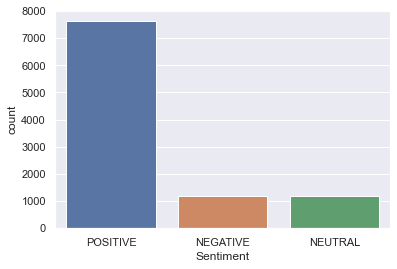

In [61]:
import seaborn as sns
sns.set_theme(style="darkgrid")
#titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="Sentiment", data=df)

# Sentiment with Sentimental Analysis Method

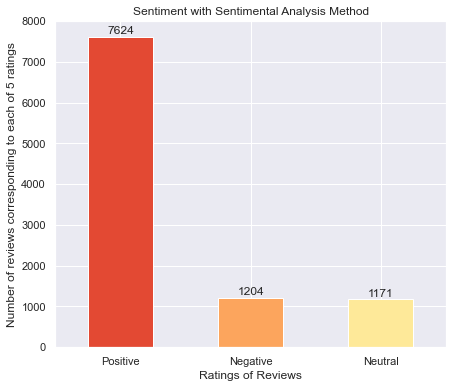

In [62]:
import matplotlib.pyplot as plt
Sentiment = df['Sentiment'].value_counts()
plt.figure(figsize=(7, 6))
ax = Sentiment.plot(kind='bar', rot=0, color=sns.color_palette("RdYlGn", 6))
ax.set_title("Sentiment with Sentimental Analysis Method", y = 1)
ax.set_xlabel('Ratings of Reviews')
ax.set_ylabel('Number of reviews corresponding to each of 5 ratings')
ax.set_xticklabels(('Positive', 'Negative', 'Neutral'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

 #                                   Extract Output to MYSQL

In [63]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [64]:
pip install pandas



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [65]:
import pyodbc as pyodbc
conn_str = (
    r'DRIVER={SQL Server};'
    r'SERVER=LAPTOP-AAHQHGCP\SQLEXPRESS;'
    r'DATABASE=Sentimental_Analysis;'
    r'Trusted_Connection=yes;'
)
cnxn = pyodbc.connect(conn_str)
print('CONNECTION SUCCESSFUL ')

CONNECTION SUCCESSFUL 


In [70]:
import MySQLdb
import csv
import sys
cursor = cnxn.cursor()
#csv_data = csv.reader(open('Sentimental_analysis_Amazon_Data.csv'),encoding='cp850')
#csv_data = csv.reader(open('Sample123.csv'))
with open('Sentimental_analysis_Amazon_Data.csv', mode ='r',encoding='cp850')as file: 
  # reading the CSV file
  csv_data = csv.reader(file)
  header = next(csv_data)

  #print('Importing the CSV Files')
  for row in csv_data:
    #print(row)
    try:
        cursor.execute(
          "INSERT INTO amazon_data VALUES (?, ?, ?, ?,?, ?, ?, ?,?, ?, ?, ?,?, ?, ?, ?,?,?,?)", tuple(row))
    except:
        print("An exception occurred")
        
        
cnxn.commit()
cursor.close()
print("Finish")

An exception occurred
An exception occurred
An exception occurred
Finish
